### Building accurate, data-driven models that can extract trends from historical pricing data.

In [2]:
import pandas as pd
import re
import numpy as np


In [ ]:
# Load datasets
df1 = pd.read_csv("Sun4AugWoolworths.csv")
df2 = pd.read_csv("Wed7AugWoolworths.csv")
df3 = pd.read_csv("Tue27AugWoolworths.csv")

# Display the first rows of each dataset
print("Dataset 1 - Sun4AugWoolworths.csv:")
print(df1.head())
print("\nDataset 2 - Wed7AugWoolworths.csv:")
print(df2.head())
print("\nDataset 3 - Tue27AugWoolworths.csv:")
print(df3.head())


Dataset 1 - Sun4AugWoolworths.csv:
   Product Code     Category                    Item Name Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each      $0.77   
1        134034  Fruit & Veg            Fresh Tomato Each      $0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet      $4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each      $0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each      $0.83   

  Best Unit Price Item Price    Unit Price Price Was Special Text  \
0     $0.77 / 1EA      $0.77   $0.77 / 1EA       NaN          NaN   
1     $0.65 / 1EA      $0.65   $0.65 / 1EA       NaN          NaN   
2    $16.00 / 1KG      $4.00  $16.00 / 1KG       NaN          NaN   
3     $0.86 / 1EA      $0.86   $0.86 / 1EA       NaN          NaN   
4     $0.83 / 1EA      $0.83   $0.83 / 1EA       NaN          NaN   

  Complex Promo Text                                               Link  
0                NaN  https://www.woolworth

In [4]:
# Define the clean_price function
def clean_price(price):
    if isinstance(price, str):
        # Remove the dollar sign
        price = price.replace('$', '').strip()

        # Remove any unit of measurement (e.g., / 1EA, / 1KG, / 100G)
        price = re.sub(r'/.*', '', price).strip()

        try:
            return float(price)
        except ValueError:
            return None
    return price

# Apply the updated clean_price function to your dataframes
df1['Best Price'] = df1['Best Price'].apply(clean_price)
df2['Best Price'] = df2['Best Price'].apply(clean_price)
df3['Best Price'] = df3['Best Price'].apply(clean_price)

df1['Best Unit Price'] = df1['Best Unit Price'].apply(clean_price)
df2['Best Unit Price'] = df2['Best Unit Price'].apply(clean_price)
df3['Best Unit Price'] = df3['Best Unit Price'].apply(clean_price)


In [5]:
# Check for missing values
print("Missing values in Sun4AugWoolworths.csv:")
print(df1.isnull().sum())
print("\nMissing values in Wed7AugWoolworths.csv:")
print(df2.isnull().sum())
print("\nMissing values in Tue27AugWoolworths.csv:")
print(df3.isnull().sum())

Missing values in Sun4AugWoolworths.csv:
Product Code              0
Category                  0
Item Name                 0
Best Price                0
Best Unit Price        3345
Item Price                0
Unit Price             3339
Price Was             17524
Special Text          13813
Complex Promo Text    20771
Link                      0
dtype: int64

Missing values in Wed7AugWoolworths.csv:
Product Code              0
Category                  0
Item Name                 0
Best Price                0
Best Unit Price        3264
Item Price                0
Unit Price             3260
Price Was             16928
Special Text          13249
Complex Promo Text    19961
Link                      0
dtype: int64

Missing values in Tue27AugWoolworths.csv:
Product Code              0
Category                  0
Item Name                 0
Best Price                0
Best Unit Price        3460
Item Price                0
Unit Price             3453
Price Was             19060
Special 

In [6]:
# Define a function to clean the price columns
def clean_price_column(df, column_name):
    # Replace empty strings with NaN
    df[column_name] = df[column_name].replace('', np.nan)
    # Remove non-numeric characters (except periods) and convert to float
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)) if pd.notnull(x) else x).astype(float)

# Clean the 'Best Price', 'Best Unit Price', 'Item Price', 'Unit Price', and 'Price Was' columns
for column in ['Best Price', 'Best Unit Price', 'Item Price', 'Unit Price', 'Price Was']:
    clean_price_column(df1, column)
    clean_price_column(df2, column)
    clean_price_column(df3, column)

# Check the cleaned data
print(df1.head())
print(df2.head())
print(df3.head())


   Product Code     Category                    Item Name  Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each        0.77   
1        134034  Fruit & Veg            Fresh Tomato Each        0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet        4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each        0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each        0.83   

   Best Unit Price  Item Price  Unit Price  Price Was Special Text  \
0             0.77        0.77       0.771        NaN          NaN   
1             0.65        0.65       0.651        NaN          NaN   
2            16.00        4.00      16.001        NaN          NaN   
3             0.86        0.86       0.861        NaN          NaN   
4             0.83        0.83       0.831        NaN          NaN   

  Complex Promo Text                                               Link  
0                NaN  https://www.woolworths.com.au/shop/productde

In [7]:
# Fill missing values for numeric columns with the median value
median_best_unit_price = df1['Best Unit Price'].median()
df1['Best Unit Price'].fillna(median_best_unit_price, inplace=True)
df2['Best Unit Price'].fillna(median_best_unit_price, inplace=True)
df3['Best Unit Price'].fillna(median_best_unit_price, inplace=True)

median_price_was = df1['Price Was'].median()
df1['Price Was'].fillna(median_price_was, inplace=True)
df2['Price Was'].fillna(median_price_was, inplace=True)
df3['Price Was'].fillna(median_price_was, inplace=True)

# Fill text columns with a placeholder
df1['Special Text'].fillna('None', inplace=True)
df2['Special Text'].fillna('None', inplace=True)
df3['Special Text'].fillna('None', inplace=True)

df1['Complex Promo Text'].fillna('None', inplace=True)
df2['Complex Promo Text'].fillna('None', inplace=True)
df3['Complex Promo Text'].fillna('None', inplace=True)

# Fill missing 'Unit Price' with median value within each category
df1['Unit Price'] = df1.groupby('Category')['Unit Price'].transform(lambda x: x.fillna(x.median()))
df2['Unit Price'] = df2.groupby('Category')['Unit Price'].transform(lambda x: x.fillna(x.median()))
df3['Unit Price'] = df3.groupby('Category')['Unit Price'].transform(lambda x: x.fillna(x.median()))

# After filling missing values, check if there are any left
print("Missing values in Sun4AugWoolworths.csv after filling:")
print(df1.isnull().sum())
print("\nMissing values in Wed7AugWoolworths.csv after filling:")
print(df2.isnull().sum())
print("\nMissing values in Tue27AugWoolworths.csv after filling:")
print(df3.isnull().sum())


Missing values in Sun4AugWoolworths.csv after filling:
Product Code          0
Category              0
Item Name             0
Best Price            0
Best Unit Price       0
Item Price            0
Unit Price            0
Price Was             0
Special Text          0
Complex Promo Text    0
Link                  0
dtype: int64

Missing values in Wed7AugWoolworths.csv after filling:
Product Code          0
Category              0
Item Name             0
Best Price            0
Best Unit Price       0
Item Price            0
Unit Price            0
Price Was             0
Special Text          0
Complex Promo Text    0
Link                  0
dtype: int64

Missing values in Tue27AugWoolworths.csv after filling:
Product Code          0
Category              0
Item Name             0
Best Price            0
Best Unit Price       0
Item Price            0
Unit Price            0
Price Was             0
Special Text          0
Complex Promo Text    0
Link                  0
dtype: int64


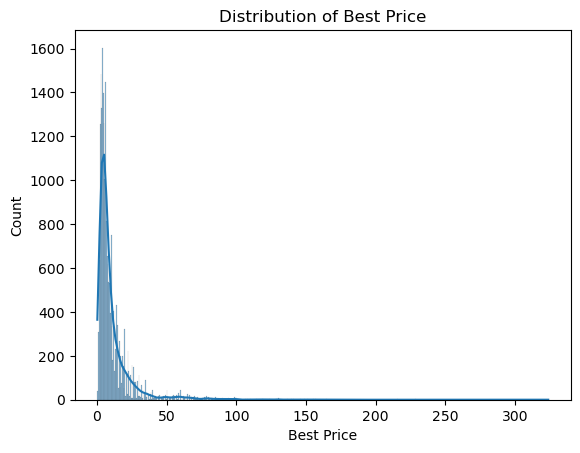

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['Best Price'], kde=True)
plt.title('Distribution of Best Price')
plt.show()


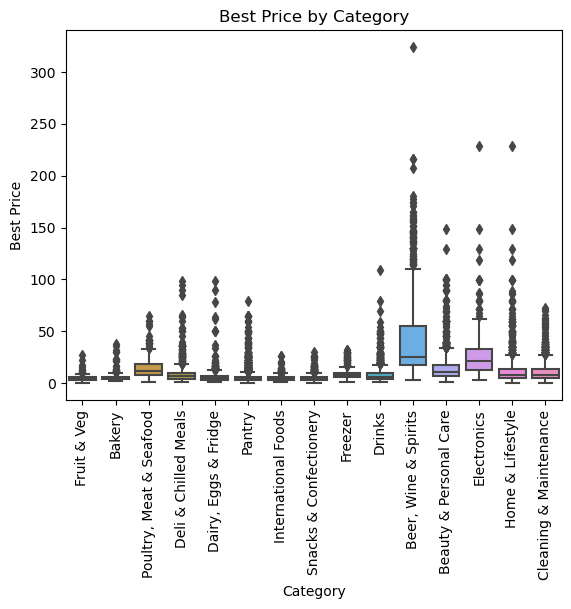

In [9]:
sns.boxplot(x='Category', y='Best Price', data=df1)
plt.xticks(rotation=90)
plt.title('Best Price by Category')
plt.show()


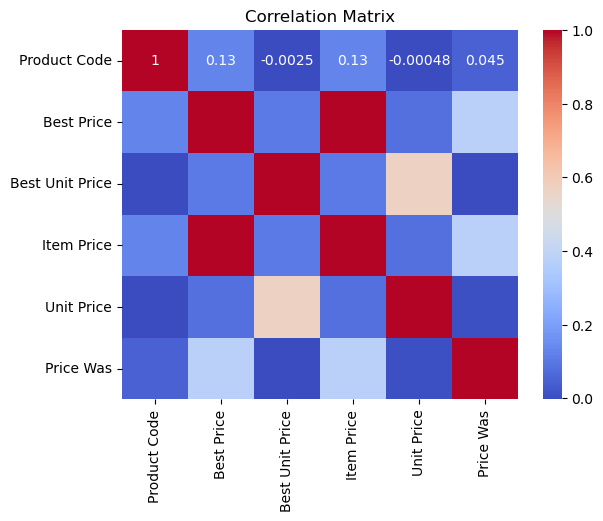

In [10]:
# Select only the numeric columns
numeric_df = df1.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


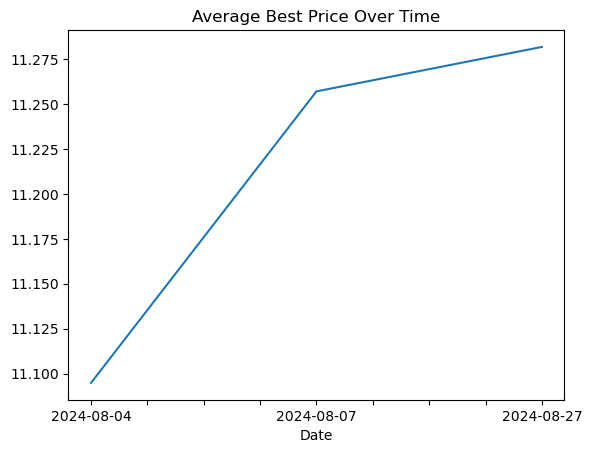

In [11]:
df1['Date'] = '2024-08-04'  # Add the date for the dataset
df2['Date'] = '2024-08-07'
df3['Date'] = '2024-08-27'
df_combined = pd.concat([df1, df2, df3])

df_combined.groupby('Date')['Best Price'].mean().plot()
plt.title('Average Best Price Over Time')
plt.show()


In [12]:
df_combined['Price Change'] = df_combined.groupby('Product Code')['Best Price'].diff()


In [13]:
df_combined['Discount Rate'] = (df_combined['Price Was'] - df_combined['Best Price']) / df_combined['Price Was']


In [14]:
df_combined['Price Volatility'] = df_combined.groupby('Product Code')['Best Price'].transform('std')


In [15]:
features = ['Best Price', 'Item Price', 'Unit Price', 'Discount Rate', 'Price Change', 'Price Volatility']
X = df_combined[features]
y = df_combined['Best Price'].shift(-1)  # Predict the next price


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (or you can choose median/most_frequent)
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use the same transformation for test set


In [18]:
# Impute missing values with the mean (you could also use median or mode)
y_train.fillna(y_train.mean(), inplace=True)


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 169.5321984806606


Root Mean Squared Error: 13.020453082771759
Mean Absolute Error: 6.663323967283139
R-squared: 0.3113741880137435


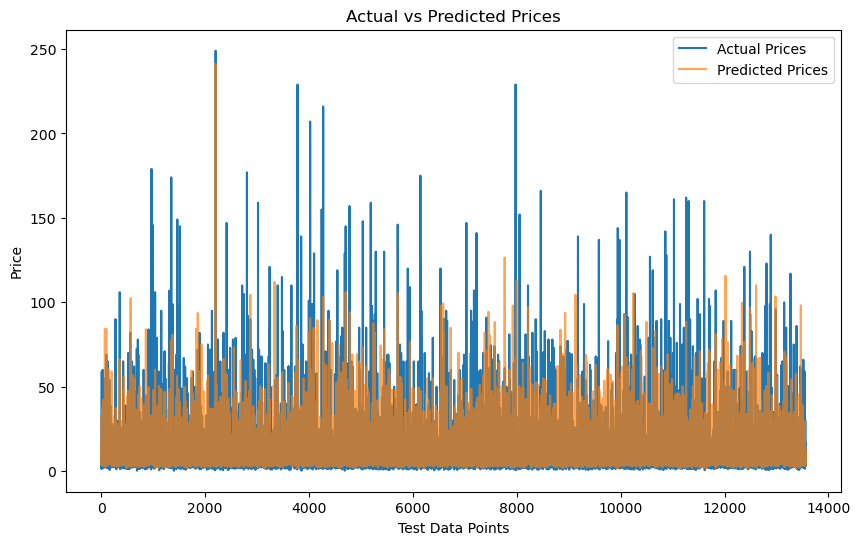

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate additional metrics
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Price')
plt.legend()
plt.show()


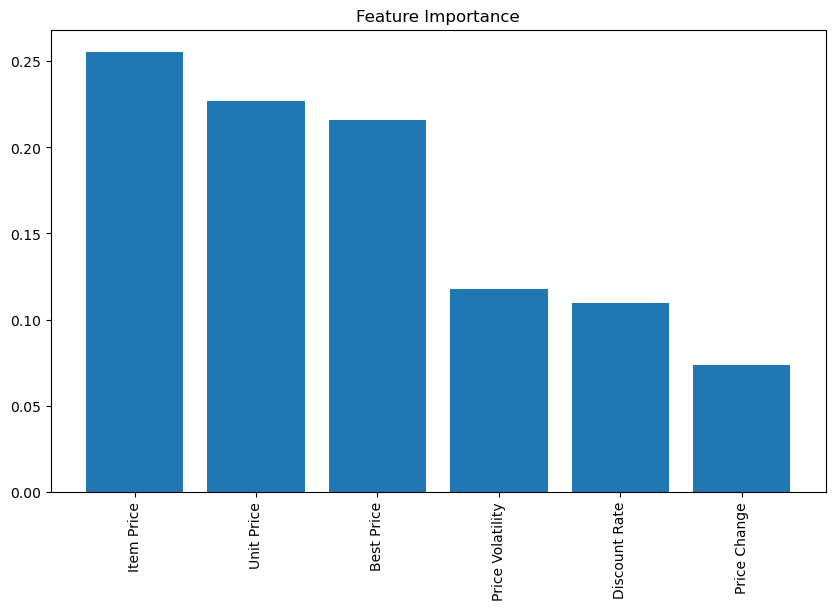

In [22]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.show()


3     0.81
4     0.81
5     0.81
6     0.81
7     0.81
8     0.81
9     0.81
10    0.81
11    0.81
12    0.81
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

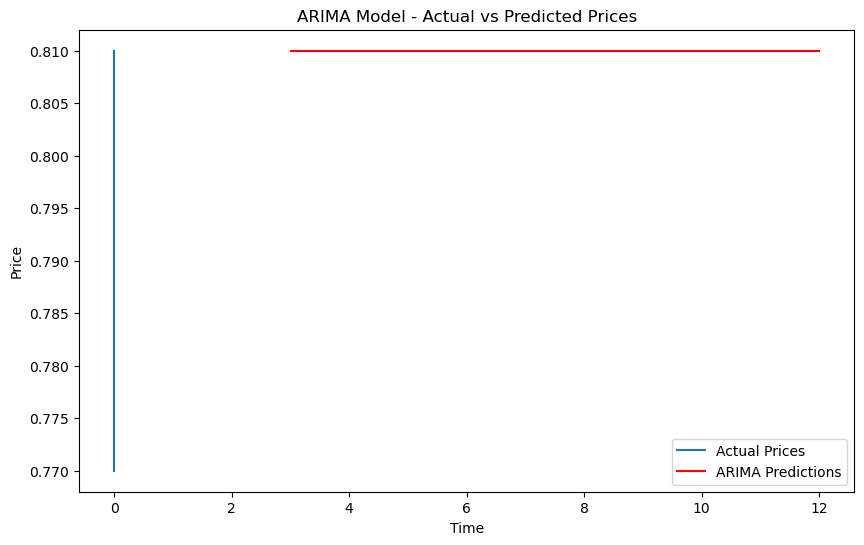

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you want to predict the price for a single product
product_code = 133211
product_data = df_combined[df_combined['Product Code'] == product_code]['Best Price']

# Fit an ARIMA model (or SARIMA with seasonal order)
model = ARIMA(product_data, order=(5, 1, 0))
arima_result = model.fit()

# Make predictions
arima_forecast = arima_result.forecast(steps=10)  # Forecast next 10 periods
print(arima_forecast)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(product_data.index, product_data, label='Actual Prices')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model - Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Days with predicted price drops:
             Date  Product Code  Best Price  Price Change
2      2024-08-07        144607        3.50         -0.50
3      2024-08-07        105919        0.79         -0.07
7      2024-08-07        135306        1.98         -0.25
12     2024-08-07        149620        2.50         -0.50
26     2024-08-07        259450        0.83         -0.33
...           ...           ...         ...           ...
23646  2024-08-27        488761        6.75         -2.25
23715  2024-08-27        166017        3.00         -1.00
23717  2024-08-27        173876        6.30         -0.70
23718  2024-08-27        174161        6.30         -0.70
23720  2024-08-27        685093        7.60         -0.85

[6093 rows x 4 columns]


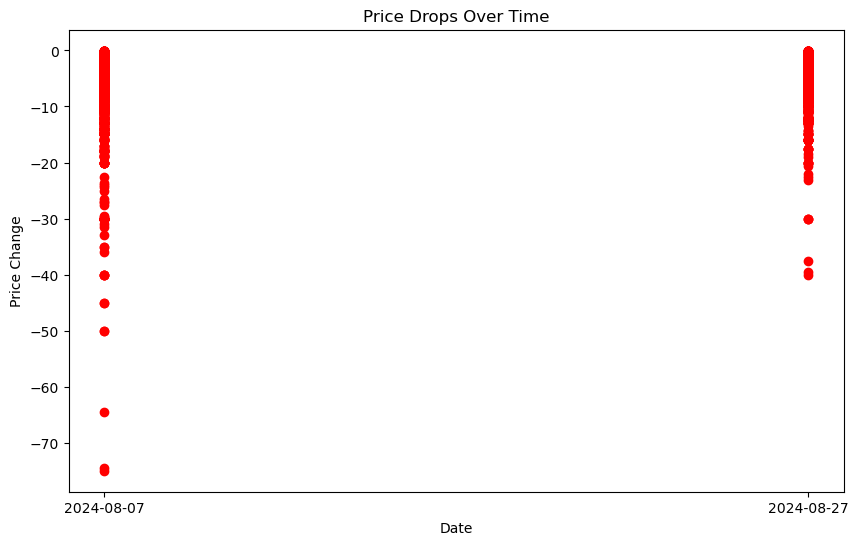

In [24]:
# Example analysis: identify the days when prices are predicted to drop
price_drop_days = df_combined[df_combined['Price Change'] < 0]

print("Days with predicted price drops:")
print(price_drop_days[['Date', 'Product Code', 'Best Price', 'Price Change']])

# Visualize price drops over time
plt.figure(figsize=(10, 6))
plt.plot(price_drop_days['Date'], price_drop_days['Price Change'], 'ro')
plt.title('Price Drops Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()


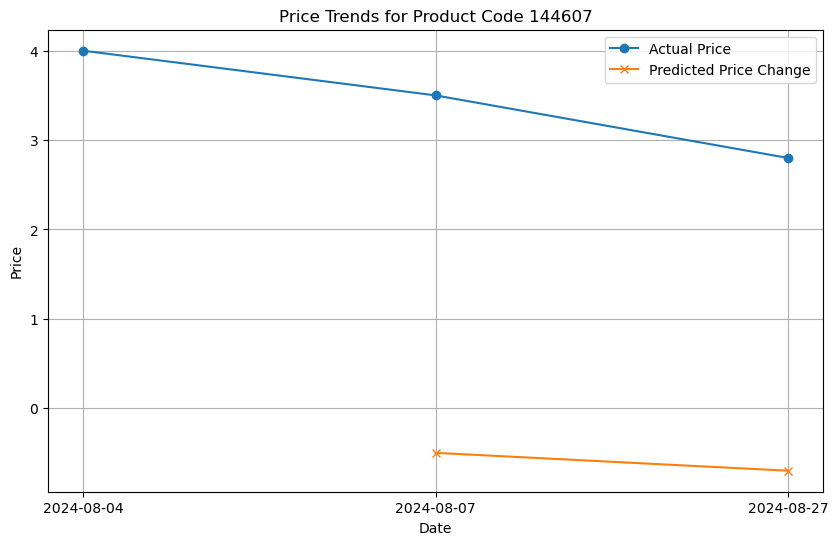

In [25]:
# Example: Visualize price trends for a specific product
product_code = 144607  # Replace with a product code of interest
product_data = df_combined[df_combined['Product Code'] == product_code]

plt.figure(figsize=(10, 6))
plt.plot(product_data['Date'], product_data['Best Price'], label='Actual Price', marker='o')
plt.plot(product_data['Date'], product_data['Price Change'], label='Predicted Price Change', marker='x')
plt.title(f'Price Trends for Product Code {product_code}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
df_combined['Expected Savings'] = df_combined['Price Was'] - df_combined['Best Price']
savings_df = df_combined[df_combined['Price Change'] < 0].sort_values(by='Expected Savings', ascending=False)

print("Top products with the highest expected savings:")
print(savings_df[['Date', 'Product Code', 'Item Name', 'Best Price', 'Price Was', 'Expected Savings']].head(10))


Top products with the highest expected savings:
             Date  Product Code  \
14273  2024-08-07         93472   
16477  2024-08-07        488763   
16760  2024-08-07        520199   
16808  2024-08-07         83607   
17581  2024-08-07        276189   
17144  2024-08-07        604927   
16378  2024-08-07        258144   
15458  2024-08-07        820433   
16476  2024-08-07         80121   
17635  2024-08-07        820434   

                                               Item Name  Best Price  \
14273            Johnnie Walker Blue Scotch Whisky 700ml       249.0   
16477    Oral B Pro 2500x Electric Toothbrush Black Each        74.5   
16760          Oral B Pro 1500x Electric Toothbrush Each        64.5   
16808            Oral B Pro 800 Electric Toothbrush Each        50.0   
17581       Oral B Pro 800 Electric Toothbrush Blue Each        50.0   
17144       Oral B Pro 300 Kids Electric Toothbrush Each        45.0   
16378  Oral B Pro 300 Black Electric Toothbrush Set Each      

In [27]:
def classify_stability(std):
    if std < 0.5:
        return 'Stable'
    elif 0.5 <= std < 1.5:
        return 'Volatile'
    else:
        return 'Highly Volatile'

df_combined['Price Stability'] = df_combined['Price Volatility'].apply(classify_stability)

stability_counts = df_combined['Price Stability'].value_counts()
print("Product Price Stability Distribution:")
print(stability_counts)


Product Price Stability Distribution:
Stable             41438
Highly Volatile    13888
Volatile           12485
Name: Price Stability, dtype: int64


In [28]:
best_time_to_buy = df_combined.loc[df_combined.groupby('Product Code')['Best Price'].idxmin()]
best_time_to_buy = best_time_to_buy[['Product Code', 'Item Name', 'Date', 'Best Price']].sort_values(by='Date')

print("Best Time to Buy for Products:")
print(best_time_to_buy.head(10))


Best Time to Buy for Products:
       Product Code                                          Item Name  \
10488        666684                   Licorice Lovers Soft Eating 250g   
17783        575970  Bull Dog Skincare For Men Original Face Wash 1...   
13165        187000    Mcguigan Zero Alcohol Free Sparkling Rose 750ml   
6455         575974  Queen Celebrating 120 Years Pure Vanilla Extra...   
15574        186989        Lynx Men Antiperspirant Roll On Africa 50ml   
5526         575977  Sanitarium Up & Go Protein Energize Strawberry...   
2508          57571  Foster Clark's Snak Pack Strawberry Flavoured ...   
21197        576010         Sabco Duex Bathroom Sponge Scrubber 2 Pack   
14573        674565                        Aviation American Gin 700ml   
6132         576098                  Queen Finest Vanilla Bean Pods 4g   

             Date  Best Price  
10488  2024-08-04        2.75  
17783  2024-08-04       15.00  
13165  2024-08-04        8.50  
6455   2024-08-04       15

### Random Forest Regressor that predicts product price changes based on engineered features like price volatility, price change percentages, and rolling averages:

In [30]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [31]:
# Load datasets
df1 = pd.read_csv("Sun4AugWoolworths.csv")
df2 = pd.read_csv("Wed7AugWoolworths.csv")
df3 = pd.read_csv("Tue27AugWoolworths.csv")

# Display the first few rows of each dataset
print("Dataset 1 - Sun4AugWoolworths.csv:")
print(df1.head())
print("\nDataset 2 - Wed7AugWoolworths.csv:")
print(df2.head())
print("\nDataset 3 - Tue27AugWoolworths.csv:")
print(df3.head())


Dataset 1 - Sun4AugWoolworths.csv:
   Product Code     Category                    Item Name Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each      $0.77   
1        134034  Fruit & Veg            Fresh Tomato Each      $0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet      $4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each      $0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each      $0.83   

  Best Unit Price Item Price    Unit Price Price Was Special Text  \
0     $0.77 / 1EA      $0.77   $0.77 / 1EA       NaN          NaN   
1     $0.65 / 1EA      $0.65   $0.65 / 1EA       NaN          NaN   
2    $16.00 / 1KG      $4.00  $16.00 / 1KG       NaN          NaN   
3     $0.86 / 1EA      $0.86   $0.86 / 1EA       NaN          NaN   
4     $0.83 / 1EA      $0.83   $0.83 / 1EA       NaN          NaN   

  Complex Promo Text                                               Link  
0                NaN  https://www.woolworth

In [32]:
# Define the clean_price function
def clean_price(price):
    if isinstance(price, str):
        # Remove the dollar sign
        price = price.replace('$', '').strip()
        # Remove any unit of measurement (e.g., / 1EA, / 1KG, / 100G)
        price = re.sub(r'/.*', '', price).strip()
        try:
            return float(price)
        except ValueError:
            return None
    return price

# Apply the updated clean_price function to your dataframes
for df in [df1, df2, df3]:
    df['Best Price'] = df['Best Price'].apply(clean_price)
    df['Best Unit Price'] = df['Best Unit Price'].apply(clean_price)
    df['Item Price'] = df['Item Price'].apply(clean_price)
    df['Unit Price'] = df['Unit Price'].apply(clean_price)
    df['Price Was'] = df['Price Was'].apply(clean_price)


In [33]:
# Fill missing values for numeric columns with the median value
for df in [df1, df2, df3]:
    df['Best Unit Price'].fillna(df['Best Unit Price'].median(), inplace=True)
    df['Price Was'].fillna(df['Price Was'].median(), inplace=True)
    df['Unit Price'].fillna(df.groupby('Category')['Unit Price'].transform('median'), inplace=True)
    df['Special Text'].fillna('None', inplace=True)
    df['Complex Promo Text'].fillna('None', inplace=True)


In [34]:
# Add a Date column to each dataset
df1['Date'] = '2024-08-04'
df2['Date'] = '2024-08-07'
df3['Date'] = '2024-08-27'

# Concatenate the datasets
df_combined = pd.concat([df1, df2, df3], ignore_index=True)


In [35]:
# Create price change feature
df_combined['Price Change'] = df_combined.groupby('Product Code')['Best Price'].diff()

# Create discount rate feature
df_combined['Discount Rate'] = (df_combined['Price Was'] - df_combined['Best Price']) / df_combined['Price Was']

# Create price volatility feature
df_combined['Price Volatility'] = df_combined.groupby('Product Code')['Best Price'].transform('std')

# Handle missing values for new columns
df_combined['Price Change'].fillna(0, inplace=True)
df_combined['Discount Rate'].fillna(0, inplace=True)
df_combined['Price Volatility'].fillna(0, inplace=True)


In [36]:
# Select features and target
features = ['Best Price', 'Item Price', 'Unit Price', 'Discount Rate', 'Price Change', 'Price Volatility']
X = df_combined[features]
y = df_combined['Best Price'].shift(-1)  # Predict the next price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict future prices
y_pred = model.predict(X_test)


In [39]:
# Choose a product to analyze for future predictions
product_code = 157649  # Example: Cavendish Bananas Each

# Filter data for the selected product
product_data = df_combined[df_combined['Product Code'] == product_code]

# Predict future prices for the product
X_product = product_data[features].dropna()  # Drop rows with NaN values
y_product = model.predict(X_product)

# Print the predicted prices
print(f"Predicted future prices for Product Code {product_code}: {y_product}")


Predicted future prices for Product Code 157649: [1.93265  1.510325 3.809055]


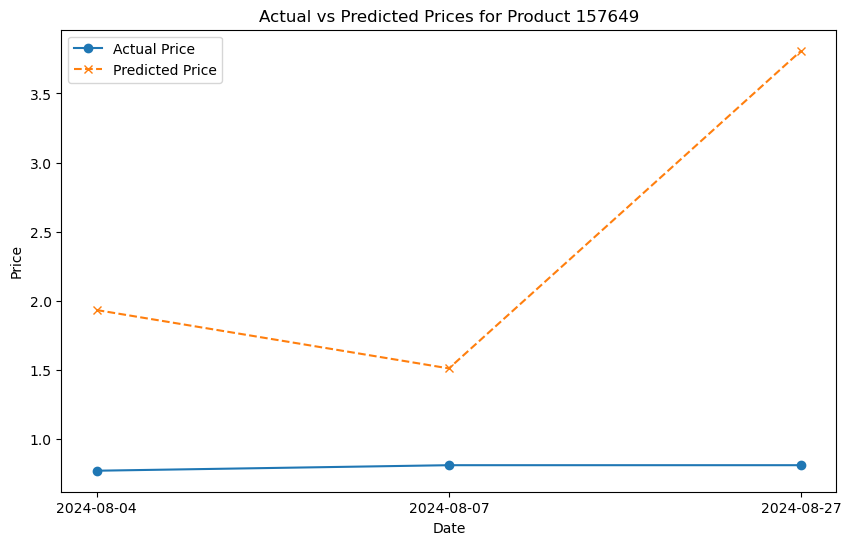

In [40]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(product_data['Date'], product_data['Best Price'], label='Actual Price', marker='o')
plt.plot(product_data['Date'], y_product, label='Predicted Price', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices for Product {product_code}')
plt.legend()
plt.show()


In [41]:
# Ensure Date is in datetime format
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Set Date as index (important for time-series forecasting)
df_combined.set_index('Date', inplace=True)

# Sort the data by Date
df_combined.sort_index(inplace=True)


In [42]:
from pmdarima import auto_arima

# Fit an ARIMA model on the Best Price data
# Seasonal=False if there is no seasonality
model = auto_arima(df_combined['Best Price'], seasonal=False, trace=True)

# Make predictions for the next 10 days
future_predictions = model.predict(n_periods=10)
print(future_predictions)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=526046.727, Time=71.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=563221.659, Time=1.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545479.980, Time=1.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=527020.243, Time=9.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=563219.659, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=526060.965, Time=49.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=526373.291, Time=23.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=526047.860, Time=87.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=526784.483, Time=108.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=526598.367, Time=16.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=526649.549, Time=22.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=526253.882, Time=32.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=526546.093, Time=60.79 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=526044.733, Time=15.6

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df_combined.reset_index()[['Date', 'Best Price']].rename(columns={'Date': 'ds', 'Best Price': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Predict for the next 10 days
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

# Show the predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


14:00:37 - cmdstanpy - INFO - Chain [1] start processing
14:00:37 - cmdstanpy - INFO - Chain [1] done processing


           ds       yhat  yhat_lower  yhat_upper
0  2024-08-04  11.094705   -7.428008   31.097691
1  2024-08-07  11.257128   -8.257991   30.675024
2  2024-08-27  11.282189   -7.431597   31.303385
3  2024-08-28  20.941468    0.385087   39.784204
4  2024-08-29  14.935486   -4.357408   34.553248
5  2024-08-30  15.396653   -2.801838   34.742633
6  2024-08-31  15.857800   -5.906656   35.439747
7  2024-09-01  24.886053    5.645661   44.627331
8  2024-09-02  16.780132   -2.706703   36.119630
9  2024-09-03  14.510303   -5.492191   35.055997
10 2024-09-04  24.169582    3.741103   43.220087
11 2024-09-05  18.163600   -1.533907   37.101567
12 2024-09-06  18.624767   -1.520918   36.963485


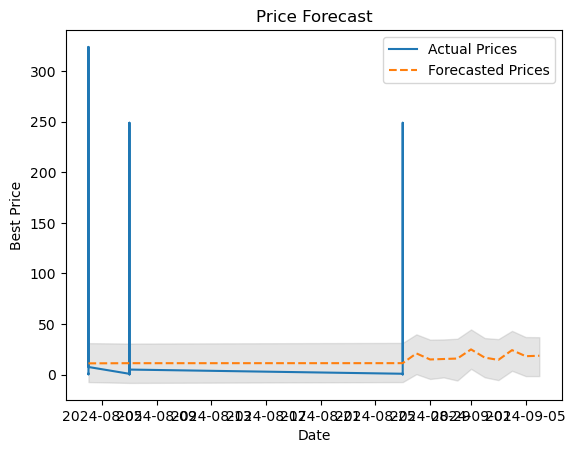

In [44]:
import matplotlib.pyplot as plt

# Plot the original data and the forecast
plt.plot(df_combined.index, df_combined['Best Price'], label='Actual Prices')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Prices', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Best Price')
plt.legend()
plt.show()
